@Author: Bhupinder Singh

@Date: 17-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 18-01-2023

@Title: The data given in the url is related with direct marketing campaigns of a banking
        institution. The marketing campaigns were based on phone calls. Often, more
        than one contact to the same client was required, in order to access if the product
        (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
        predict whether client will subscribe to term deposit

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc

### Import the dataset 

In [2]:
data = pd.read_csv('bank.csv', sep=';')

### Getting Insights of dataset

In [3]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Checking for Null values in data set

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Outliers in data set

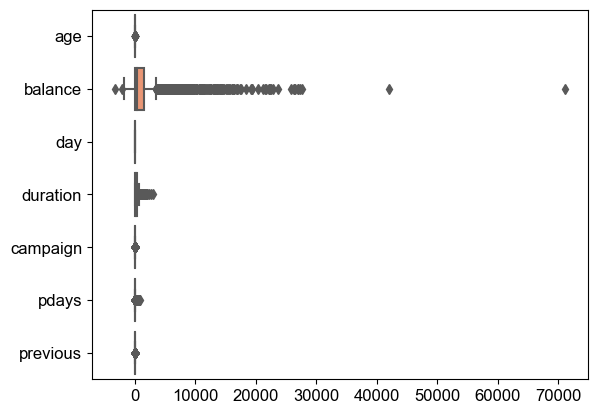

In [7]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [8]:
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.85]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  age
capping the  job
capping the  marital
capping the  education
capping the  default
capping the  balance
capping the  housing
capping the  loan
capping the  contact
capping the  day
capping the  month
capping the  duration
capping the  campaign
capping the  pdays
capping the  previous
capping the  poutcome
capping the  y


C:\Users\Asus\AppData\Local\Temp\ipykernel_30304\2180290232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_30304\2180290232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


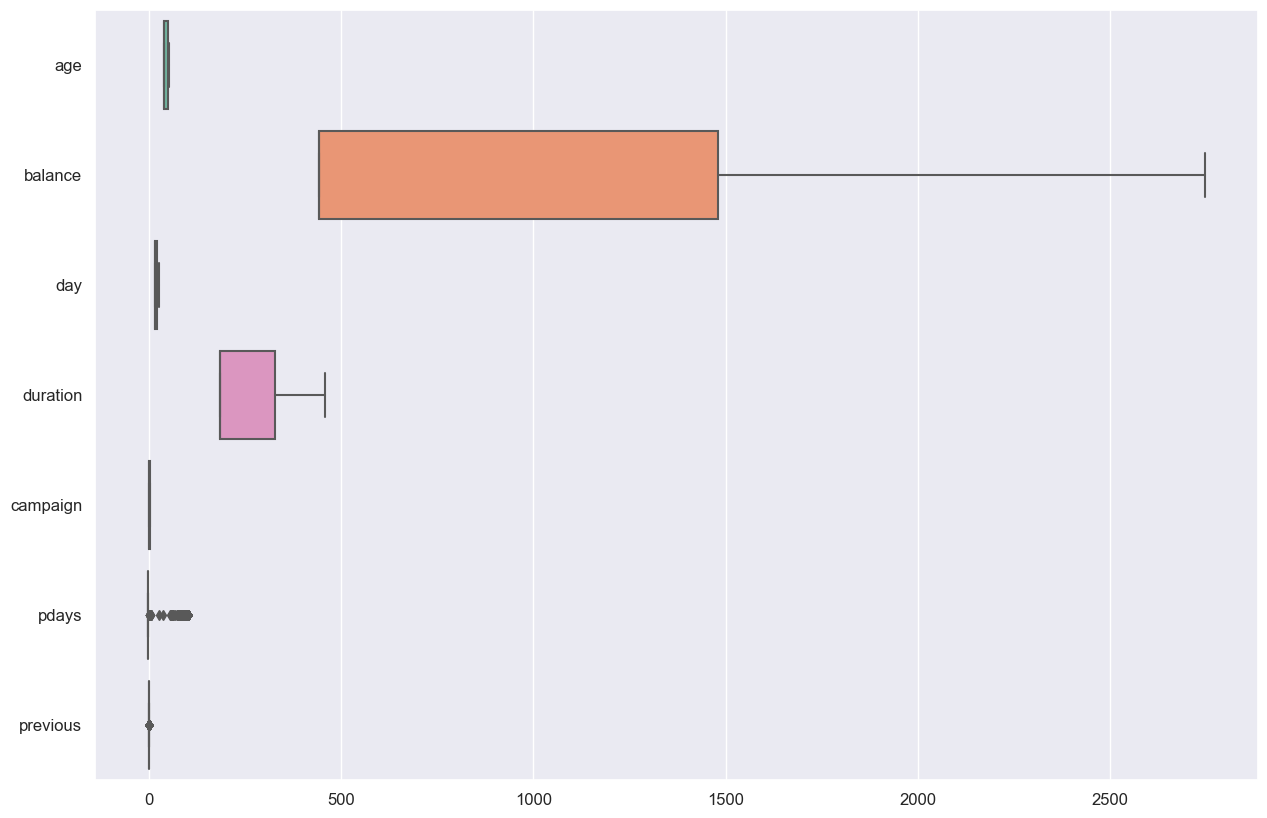

In [9]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

Data encoding

In [10]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,unemployed,married,primary,no,1787,no,no,cellular,19,oct,185,2,-1,0,unknown,no
1,39,services,married,secondary,no,2747,yes,yes,cellular,16,may,220,2,101,1,failure,no
2,39,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,2,101,1,failure,no
3,39,management,married,tertiary,no,1476,yes,yes,unknown,16,jun,199,4,-1,0,unknown,no
4,53,blue-collar,married,secondary,no,444,yes,no,unknown,16,may,226,2,-1,0,unknown,no


In [11]:
data = data.drop(['marital','contact','day','month','poutcome'], axis=1)

In [12]:
data.head(5)

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,39,unemployed,primary,no,1787,no,no,185,2,-1,0,no
1,39,services,secondary,no,2747,yes,yes,220,2,101,1,no
2,39,management,tertiary,no,1350,yes,no,185,2,101,1,no
3,39,management,tertiary,no,1476,yes,yes,199,4,-1,0,no
4,53,blue-collar,secondary,no,444,yes,no,226,2,-1,0,no


In [13]:
data[ 'job' ] = data[ 'job' ].astype( 'category' )  
data[ 'education' ] = data[ 'education' ].astype( 'category' ) 
#data[ 'poutcome' ] = data[ 'poutcome' ].astype( 'category' ) 
#data['month'] = data['month'].astype( 'category' ) 
#data['marital'] = data['marital'].astype( 'category' ) 
#data['contact'] = data['contact'].astype( 'category' ) 


data['job'] = data['job'].cat.codes
data['education'] = data['education'].cat.codes
#data['poutcome'] = data['poutcome'].cat.codes
#data['month'] = data['month'].cat.codes
#data['marital'] = data['marital'].cat.codes
#data['contact'] = data['contact'].cat.codes

binary encoding

In [14]:
def binary_encode(data_frame,col_name):
    """
    Description:
        Function to binary encode the categorical columns in data frame 
    Parameter:
        data_frame: Imported dataframe
        col_name: column name that need to be encoded
    Return:
            Returns encoded_list
    """
    encoded_list = []
    for i in data_frame[col_name]:
        if ((i == 'Yes') | (i== 'yes')):
            encoded_value = 1
        else:
            encoded_value = 0
        encoded_list.append(encoded_value)
    return encoded_list

In [15]:
row,col=data.shape
default_list = binary_encode(data,'default')
data.drop(['default'],axis=1,inplace=True)
data.insert(loc=2, column="default", value=default_list)

loan_list = binary_encode(data,'loan')
data.drop(['loan'],axis=1,inplace=True)
data.insert(loc=2, column="loan", value=loan_list)

housing_list = binary_encode(data,'housing')
data.drop(['housing'],axis=1,inplace=True)
data.insert(loc=2, column="housing", value=housing_list)

y_list = binary_encode(data,'y')
data.drop(['y'],axis=1,inplace=True)
data.insert(loc=col-1, column="y", value=y_list)

In [16]:
data.head(5)

,age,job,housing,loan,default,education,balance,duration,campaign,pdays,previous,y
0,39,10,0,0,0,0,1787,185,2,-1,0,0
1,39,7,1,1,0,1,2747,220,2,101,1,0
2,39,4,1,0,0,2,1350,185,2,101,1,0
3,39,4,1,1,0,2,1476,199,4,-1,0,0
4,53,1,1,0,0,1,444,226,2,-1,0,0


vif

In [17]:
X = data[list(data.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
10,48.599383,previous
9,47.458999,pdays
0,17.868272,age
8,9.675932,campaign
7,6.711450,duration
5,3.654243,education
1,2.908431,job
6,2.524780,balance
2,2.227728,housing
3,1.195988,loan


In [18]:
data = data.drop(['pdays','age','campaign','duration','previous'], axis=1)

X = data[list(data.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,2.888381,education
0,2.415630,job
5,2.080840,balance
1,1.775088,housing
2,1.144295,loan
3,1.024244,default


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        4521 non-null   int8 
 1   housing    4521 non-null   int64
 2   loan       4521 non-null   int64
 3   default    4521 non-null   int64
 4   education  4521 non-null   int8 
 5   balance    4521 non-null   int64
 6   y          4521 non-null   int64
dtypes: int64(5), int8(2)
memory usage: 185.6 KB


### Feature Scaling

In [20]:
df = data[list(data.columns[:-1])]
for col in df.columns:
        print("Scaling the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64') | ((data[col].dtype)=='int8') | ((data[col].dtype)=='uint8')):
                data[col] = (data[col] - data[col].mean())/data[col].std()
print("Train data")
data.head(5)
'''
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(data)
data = pd.DataFrame(standard_df)
'''

Scaling the  job
Scaling the  housing
Scaling the  loan
Scaling the  default
Scaling the  education
Scaling the  balance
Train data


,job,housing,loan,default,education,balance,y
0,1.716614,-1.141925,-0.424709,-0.130744,-1.644573,0.849779,0
1,0.795158,0.875521,2.354032,-0.130744,-0.309004,1.955628,0
2,-0.126299,0.875521,-0.424709,-0.130744,1.026566,0.346388,0
3,-0.126299,0.875521,2.354032,-0.130744,1.026566,0.491530,0
4,-1.047755,0.875521,-0.424709,-0.130744,-0.309004,-0.697257,0


###  Split the dataset into training set and test set

In [21]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,job,housing,loan,default,education,balance,y
0,1.716614,-1.141925,-0.424709,-0.130744,-1.644573,0.849779,0
1,0.795158,0.875521,2.354032,-0.130744,-0.309004,1.955628,0
2,-0.126299,0.875521,-0.424709,-0.130744,1.026566,0.346388,0
3,-0.126299,0.875521,2.354032,-0.130744,1.026566,0.491530,0
4,-1.047755,0.875521,-0.424709,-0.130744,-0.309004,-0.697257,0
...,...,...,...,...,...,...,...
3611,1.409462,0.875521,-0.424709,-0.130744,-0.309004,-0.697257,0
3612,-0.126299,-1.141925,-0.424709,-0.130744,1.026566,-0.697257,0
3613,1.409462,-1.141925,-0.424709,-0.130744,-0.309004,1.922222,0
3614,0.180854,-1.141925,-0.424709,-0.130744,1.026566,-0.697257,0


Test dataframe


,job,housing,loan,default,education,balance,y
3616,-0.126299,-1.141925,-0.424709,-0.130744,1.026566,-0.697257,0
3617,-1.047755,-1.141925,-0.424709,-0.130744,-0.309004,-0.697257,0
3618,-1.354907,-1.141925,-0.424709,-0.130744,-0.309004,-0.697257,0
3619,1.409462,0.875521,-0.424709,-0.130744,-1.644573,-0.697257,0
3620,0.180854,-1.141925,2.354032,-0.130744,-0.309004,-0.519861,0
...,...,...,...,...,...,...,...
4516,0.795158,0.875521,-0.424709,-0.130744,-0.309004,-0.697257,0
4517,0.488006,0.875521,2.354032,7.646823,1.026566,-0.697257,0
4518,1.409462,-1.141925,-0.424709,-0.130744,-0.309004,-0.697257,0
4519,-1.047755,-1.141925,-0.424709,-0.130744,-0.309004,0.101027,0


((3616, 7), (905, 7))

### Extracting the values of features

In [22]:
rows,col=train_data.shape
data_n=train_data.values
m=len(data_n[:,-1])
x_train=data_n[:,0:col].reshape(m,col)

rows_2,col_2=test_data.shape
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:col_2].reshape(m2,col_2)

In [23]:
x_test

array([[-0.12629854, -1.14192506, -0.42470913, ...,  1.02656596,
        -0.69725739,  0.        ],
       [-1.04775474, -1.14192506, -0.42470913, ..., -0.30900374,
        -0.69725739,  0.        ],
       [-1.3549068 , -1.14192506, -0.42470913, ..., -0.30900374,
        -0.69725739,  0.        ],
       ...,
       [ 1.40946179, -1.14192506, -0.42470913, ..., -0.30900374,
        -0.69725739,  0.        ],
       [-1.04775474, -1.14192506, -0.42470913, ..., -0.30900374,
         0.1010273 ,  0.        ],
       [-0.74060267,  0.87552051,  2.35403181, ...,  1.02656596,
         0.09987537,  0.        ]])

In [24]:
def Euclidean_distance(row1, row2):
    """
    Description:
            Function used to calculate the euclidean distance of two points
    Parameter:
        row1 : data points of first row
        row2 : data points of second row
    Return: 
            return the distance between two points
    """
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2            #(x1-x2)**2+(y1-y2)**2
    return math.sqrt(distance)

In [25]:
def Get_Neighbors(train, test_row, num):
    """
    Description:
            Function used to get the nearest points to the test row
    Parameter:
        train : x points of train row
        test_row : x points of test row
        num : Number of neighbours
        
    Return: 
            return the points of nearest neighbours
    """
    distance = list() # []
    data1 = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data1.append(i)
    distance = np.array(distance)
    data1 = np.array(data1)
    """ we are finding index of min distance """
    index_dist = distance.argsort()
    print(f"INdex distance ===== {index_dist}")
    """ we arange our data acco. to index """
    data1 = data1[index_dist]
    print("data1 ===== ",data1)
    """ we are slicing num number of datas """
    neighbors = data1[:num]
    print("neighbours ===== ",neighbors)
    
    return neighbors

In [26]:
def predict_classification(train, test_row, num):
    """
    Description:
            Function to classify the test_row to either 0 or 1 class
    Parameter:
        train : x points of train row
        test_row : x points of test row
        num : K value ie Number of neibhours we want to consider
    Return: 
            return the predicted value
    """

    Neighbors = Get_Neighbors(train, test_row, num)
    
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

In [47]:
y_pred=[]
y_test = x_test[:, -1]
for test_row in x_test:
    prediction = predict_classification(x_train,test_row ,7)               #math.floor(math.sqrt(m))
    #print(f"We expected {test_row[-1]}, Got {prediction}")
    y_pred.append(prediction)

INdex distance ===== [ 459 3358 3165 ... 3390   48  152]
data1 =====  [[-0.12629854 -1.14192506 -0.42470913 ...  1.02656596 -0.69725739
   0.        ]
 [-0.12629854 -1.14192506 -0.42470913 ...  1.02656596 -0.69725739
   0.        ]
 [-0.12629854 -1.14192506 -0.42470913 ...  1.02656596 -0.69725739
   0.        ]
 ...
 [-0.74060267  0.87552051  2.35403181 ... -1.64457344 -0.69725739
   0.        ]
 [-0.74060267  0.87552051  2.35403181 ... -1.64457344 -0.69725739
   0.        ]
 [ 1.71661386  0.87552051  2.35403181 ... -1.64457344 -0.69725739
   0.        ]]
neighbours =====  [[-0.12629854 -1.14192506 -0.42470913 -0.13074433  1.02656596 -0.69725739
   0.        ]
 [-0.12629854 -1.14192506 -0.42470913 -0.13074433  1.02656596 -0.69725739
   0.        ]
 [-0.12629854 -1.14192506 -0.42470913 -0.13074433  1.02656596 -0.69725739
   0.        ]
 [-0.12629854 -1.14192506 -0.42470913 -0.13074433  1.02656596 -0.69725739
   0.        ]
 [-0.12629854 -1.14192506 -0.42470913 -0.13074433  1.02656596 -0

### Accuracy

In [28]:
def EvaluateTest(y_test, y_pred):
    n_correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_test)
    return acc

In [ ]:
EvaluateTest(y_test, y_pred)

0.8707182320441988

CAP Curve analysis

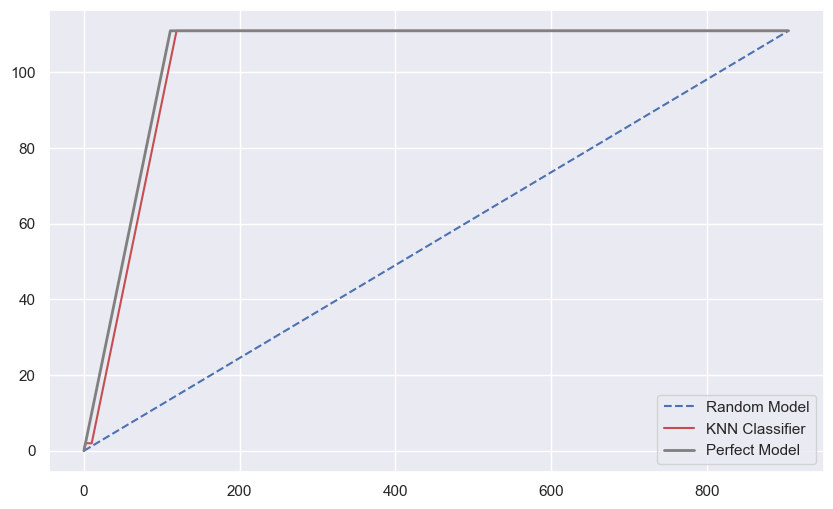

In [45]:
#plotting
total = len(y_test)

#counting 1 lables in test data
one_count = np.sum(y_test)

#counting 0 lables
zero_count = total - one_count

#model plotting
lm = [y for _,y in sorted(zip(y_pred,y_test), reverse=True)]
x = np.arange(0, total+1)
y = np.append([0], np.cumsum(lm))

plt.figure(figsize = (10, 6))

plt.plot([0,total], [0,one_count], c='b', linestyle='--', label='Random Model')
plt.plot(x,y, c='r', label = 'KNN Classifier')
plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')


plt.legend()
plt.show()

In [44]:
# Area under Random Model
a = auc([0, total], [0, one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area between Trained and Random Model
aR = auc(x, y) - a

print("Accuracy Rate for KNN Classifier: {}".format(aR / aP))

Accuracy Rate for KNN Classifier: 0.9802119499852497
